#Multiple Linear Regression
 Multiple linear regression is a statistical method used to model the linear relationship between a dependent variable and one or more independent variables (also known as predictors, exogenoius variables, regressors). It aims to fit a line (the regression line) to the observed data that can best predict the response variable, by minimizing the residuals (the difference between the observed and predicted values). The result of the regression is an equation that represents the relationship between the dependent and independent variables, which can be used to make predictions.

the r-squared is:  0.9768471041502091
the coefficient (value of a) for age, weight, constant is:  [ 0.86141469  0.3348592  30.99410295]


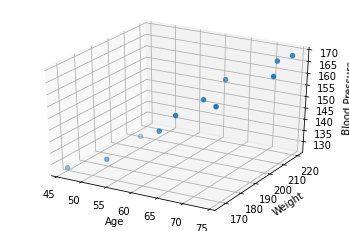

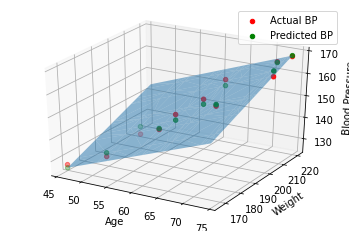

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# create arrays for the data points
X = []
Y = []

#read the csv file
csvReader = open('BloodPressure.csv')

#skips the header line
csvReader.readline()

for line in csvReader:
    y, x1, x2 = line.split(',')
    X.append([float(x1), float(x2), 1]) # add the bias term at the end
    Y.append(float(y))

# use numpy arrays so that we can use linear algebra later
X = np.array(X)
Y = np.array(Y)

# graph the data
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)
ax.set_xlabel('Age')
ax.set_ylabel('Weight')
ax.set_zlabel('Blood Pressure')

# Use Linear Algebra to solve
a = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
predictedY = np.dot(X, a)

# calculate the r-squared
SSres = Y - predictedY
SStot = Y - Y.mean()
rSquared = 1 - (SSres.dot(SSres) / SStot.dot(SStot))
print("the r-squared is: ", rSquared)
print("the coefficient (value of a) for age, weight, constant is: ", a)

# create a wiremesh for the plane that the predicted values will lie
xx, yy, zz = np.meshgrid(X[:, 0], X[:, 1], X[:, 2])
combinedArrays = np.vstack((xx.flatten(), yy.flatten(), zz.flatten())).T
Z = combinedArrays.dot(a)

# graph the original data, predicted data, and wiremesh plane
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='r', label='Actual BP')
ax.scatter(X[:, 0], X[:, 1], predictedY, color='g', label='Predicted BP')
ax.plot_trisurf(combinedArrays[:, 0], combinedArrays[:, 1], Z, alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Weight')
ax.set_zlabel('Blood Pressure')
ax.legend()
plt.show()